## Helper: visualize a single xyt configuration

In [1]:
## Imports
import sys
sys.path.insert(0, '../core')

import numpy as np
import cupy as cp
import matplotlib.pyplot as plt

import kaggle_support as kgs
import importlib
importlib.reload(kgs)
dat = kgs.dill_load(kgs.temp_dir + 'ga_multi_tree_26_to_29.pickle')

local
local


In [2]:
ga = dat.ga.ga_list[-1].ga_list[0]

init LAP CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling LAP kernels ===
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -cubin /mnt/d//packing/temp/lap_batch_saved.cu -o /mnt/d//packing/temp/lap_batch.cubin
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function 'diversity_shortcut_kernel' for 'sm_89'
ptxas info    : Function properties for diversity_shortcut_kernel
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 1 barriers, 400 bytes cmem[0]
ptxas info    : Compile time = 15.176 ms
ptxas info    : Compiling entry function 'compute_costs' for 'sm_89'
ptxas info    : Function properties for compute_costs
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 0 barriers, 384 bytes cmem[0]
ptxas info    : Compile time = 3.121 ms
ptx

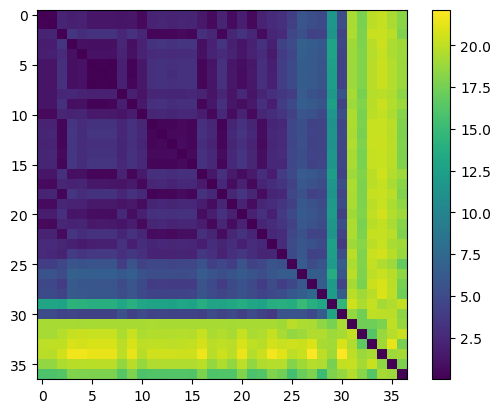

In [3]:
import lap_batch
auction_cfg = lap_batch.LAPConfig(
    algorithm='min_cost_row',
 )
mat1 = kgs.compute_genetic_diversity_matrix(ga.population.phenotype.xyt, ga.population.phenotype.xyt, lap_config=auction_cfg, allow_shortcut= False)
plt.imshow(mat1.get())
plt.colorbar()

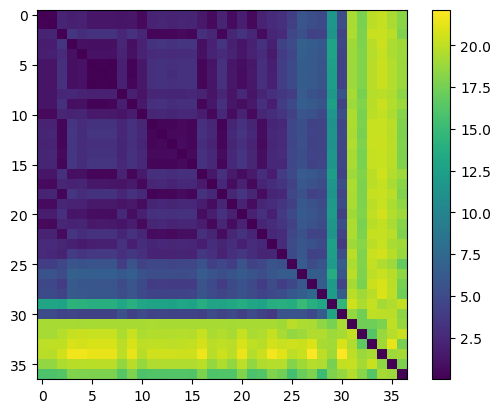

In [4]:
import lap_batch

auction_cfg = lap_batch.LAPConfig(
    algorithm='min_cost_row',
    use_diversity_kernel = True
 )

mat2 = kgs.compute_genetic_diversity_matrix(
    ga.population.phenotype.xyt,
    ga.population.phenotype.xyt,
    lap_config=auction_cfg,
    allow_shortcut= True,
    
 )
plt.imshow(mat2.get())
plt.colorbar()

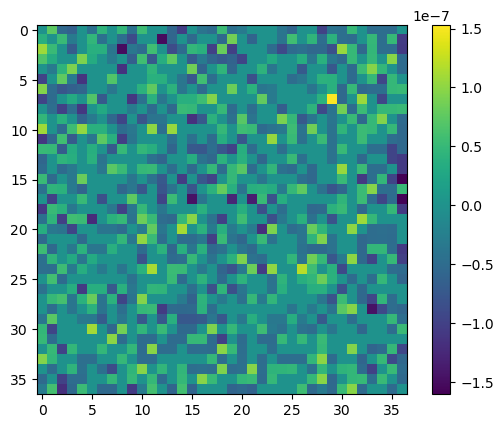

In [5]:
plt.imshow( ((mat2-mat1)/(mat2+mat1)).get() )
plt.colorbar()